-----

# Purwadhika Capstone Project Module 2 
![Purwadhika](logo.png)

## Dataset
*Customer Personality Analysis*: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

-----

## Problem Statement: 

Perusahaan ingin **memodifikasi produknya berdasarkan target pelanggannya dari berbagai jenis segmen pelanggan**. Daripada menghabiskan uang untuk memasarkan produk baru ke semua pelanggan, lebih baik memasarkan produk ke pelanggan yang mungkin membeli. Untuk itu kita harus bisa memahami kebiasaan belanja pelanggan berdasarkan karakteristiknya.

Maka sebagai seorang *Data Analyst*, kita akan coba menjawab pertanyaan berikut:  
* *Bagaimana kebiasaan belanja pelanggan berdasarkan karakteristik dari Usia ?*
* *Bagaimana kebiasaan belanja pelanggan berdasarkan karakteristik dari Pendidikan ?*
* *Bagaimana kebiasaan belanja pelanggan berdasarkan karakteristik dari Status Pernikahan ?*
* *Bagaimana kebiasaan belanja pelanggan berdasarkan karakteristik dari Pendapatan ?*
* *Bagaimana kebiasaan belanja pelanggan berdasarkan karakteristik dari Banyaknya Anak di Rumah?*
* *Bagaimana kebiasaan belanja pelanggan berdasarkan karakteristik dari Banyaknya Remaja di Rumah ?*
* *Bagaimana membuat strategi pemasaran yang lebih efektif ?*

-----

In [1]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
pd.set_option('display.max_columns', None) # untuk menampilkan semua kolom
df = pd.read_csv('marketing_campaign.csv', delimiter='\t') # import dataset dan menggunakan delimiter tab
df.head() # menampilkan 5 data teratas di dataframe

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


------

## Data Understanding

DataFrame ini berisi *Customer Personality Analysis*. Tujuannya adalah untuk membantu bisnis untuk lebih memahami pelanggannya dan mempermudah mereka untuk memodifikasi produk sesuai dengan kebutuhan, perilaku, dan perhatian khusus dari berbagai jenis pelanggan.

Terdapat 27 kolom yang dibagi menjadi beberapa kategori dalam DataFrame *Customer Personality Analysis*, diantaranya :

* People

    * ID: ID unik pelanggan
    * Year_Birth: Tahun lahir pelanggan
    * Education: Tingkat pendidikan pelanggan
    * Marital_Status: Status perkawinan Pelanggan
    * Income: Pendapatan rumah tangga tahunan pelanggan
    * Kidhome: Jumlah anak dalam rumah tangga pelanggan
    * Teenhome: Jumlah remaja dalam rumah tangga pelanggan
    * Dt_Customer: Tanggal pendaftaran pelanggan di perusahaan
    * Recency: Jumlah hari sejak pembelian terakhir pelanggan
    * Complain: 1 -> jika pelanggan melakukan komplain dalam 2 tahun terakhir, 0 -> jika tidak
    
* Products

    * MntWines: Jumlah yang dihabiskan untuk wine dalam 2 tahun terakhir
    * MntFruits: Jumlah yang dibelanjakan untuk buah dalam 2 tahun terakhir
    * MntMeatProducts: Jumlah yang dihabiskan untuk daging dalam 2 tahun terakhir
    * MntFishProducts: Jumlah yang dihabiskan untuk membeli ikan dalam 2 tahun terakhir
    * MntSweetProducts: Jumlah yang dibelanjakan untuk permen dalam 2 tahun terakhir
    * MntGoldProds: Jumlah yang dibelanjakan untuk emas dalam 2 tahun terakhir

* Promotion

    * NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon
    * AcceptedCmp1: 1 jika pelanggan menerima penawaran di kampanye pertama, 0 jika tidak
    * AcceptedCmp2: 1 jika pelanggan menerima penawaran di kampanye ke-2, 0 jika tidak
    * AcceptedCmp3: 1 jika pelanggan menerima penawaran di kampanye ke-3, 0 jika tidak
    * AcceptedCmp4: 1 jika pelanggan menerima penawaran di kampanye ke-4, 0 jika tidak
    * AcceptedCmp5: 1 jika pelanggan menerima tawaran di kampanye ke-5, 0 jika tidak
    * Response: 1 jika pelanggan menerima tawaran di kampanye terakhir, 0 sebaliknya

* Place

    * NumWebPurchases: Jumlah pembelian yang dilakukan melalui website perusahaan
    * NumCatalogPurchases: Jumlah pembelian yang dilakukan menggunakan katalog
    * NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko
    * NumWebVisitsMonth: Jumlah kunjungan ke website perusahaan dalam sebulan terakhir

In [3]:
df.shape # dataframe memiliki 2240 baris dan 29 kolom

(2240, 29)

In [4]:
df.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


In [5]:
df.info() # melihat data tipe dari masing-masing kolom 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

-----

## Data Cleaning

Data cleaning adalah suatu prosedur untuk memastikan kebenaran, konsistensi, dan kegunaan suatu data yang ada dalam dataset. Caranya adalah dengan mendeteksi adanya error atau corrupt pada data, kemudian memperbaiki atau menghapus data jika memang diperlukan.

Tahap pertama yang akan dilakukan adalah cek *Missing Value*

In [6]:
df.isnull().sum().sort_values(ascending=False) # melihat jumlah missing value pada tiap kolom

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

Terdapat 24 missing values pada kolom income

In [7]:
df[df['Income'].isnull()] # melihat data missing value

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


Data yang memiliki missing value pada kolom Income terdiri dari latar belakang yang berbeda beda. Untuk mendapatkan hasil uji analisis yang valid, maka baris dengan missing value ini akan di drop.

In [8]:
df.dropna(inplace=True) # menghilangkan baris dengan missing value
df.isnull().sum()  # menampilkan jumlah missing value

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Tahap selanjutnya adalah cek *Data Duplikat*

In [9]:
df[df.duplicated()] # tidak ada data duplikat

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


Membuat kolom baru **age** berisi umur untuk mengkategorikan customer berdasarkan usianya agar mudah dianalisa dan divisualisasikan:  
* **26-35**: Masa Dewasa Awal  
* **36-45**: Masa Dewasa Akhir  
* **46-55**: Masa Lansia Awal  
* **56-65**: Masa Lansia Akhir  
* **>65**: Masa Manula  

In [10]:
data_year = 2022 # menyesuaikan dengan tahun dipublishnya dataset
df['age'] = data_year - df['Year_Birth'] # membuat kolom baru berisi usia customer

In [11]:
df['age'].sort_values().unique() # melihat usia unik dari semua customer

array([ 26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  81,  82, 122, 123, 129], dtype=int64)

In [12]:
f = lambda x: '26-35' if (x >= 26) & (x <= 35) else '36-45' if (x >= 36) & (x <= 45) else '46-55' if (x >= 46) & (x <= 55) else '56-65' if (x >= 56) & (x <= 65) else '>65'
df['kelompok_usia'] = df['age'].apply(f) # mengelompokkan usia berdasarkan rentang tertentu
df['kelompok_usia'].value_counts() # menampilkan jumlah customer dengan rentang umurnya masing-masing

46-55    717
56-65    480
36-45    454
>65      419
26-35    146
Name: kelompok_usia, dtype: int64

Membuat kolom baru **income_class** berisi kelas pendapatan yang dibagi berdasarkan kuartil untuk mengkategorikan customer berdasarkan pendapatannya agar mudah dianalisa dan divisualisasikan:  
* Kelas 1 : **< 35303**
* Kelas 2 : **35303 - 51381**
* Kelas 3 : **51381 - 68522**
* Kelas 4 : **> 68522**

In [13]:
f = lambda x: '1' if (x < 35303) else '2' if (x >= 35303) & (x <= 51381) else '3' if (x >= 51381) & (x <= 68522) else '4'
df['income_class'] = df['Income'].apply(f) # mengelompokkan pendapatan berdasarkan rentang quartil
df['income_class'].value_counts() # menampilkan jumlah customer dengan kelas pedapatan masing-masing

3    554
2    554
4    554
1    554
Name: income_class, dtype: int64

-----

## Data Analysis
Pada tahap ini melibatkan pengumpulan semua informasi, memproses, menjelajahi, dan menggunakannya untuk menemukan pola dan wawasan lainnya. 

### Bagaimana kebiasaan belanja pelanggan berdasarkan karakteristik dari Usia ?

C:\Users\justi\AppData\Local\Temp\ipykernel_25364\3836556385.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['kelompok_usia'], as_index=True)['MntWines','MntFruits','MntMeatProducts',


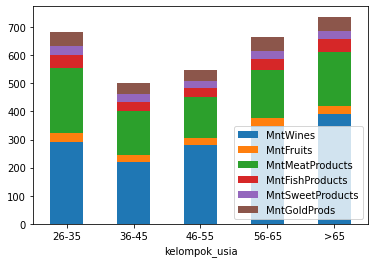

In [14]:
df.groupby(['kelompok_usia'], as_index=True)['MntWines','MntFruits','MntMeatProducts',
                                             'MntFishProducts','MntSweetProducts',
                                             'MntGoldProds'].mean().plot.bar(stacked=True)
plt.xticks(rotation=0)
plt.legend(loc=4)
plt.show()
# Memvisualisasikan Rata-rata pembelian produk berdasarkan Usia

In [15]:
df.groupby('kelompok_usia')[['MntWines','MntFruits','MntMeatProducts',
                             'MntFishProducts','MntSweetProducts','MntGoldProds']].mean()
# Rata-rata pembelian produk berdasarkan Usia

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
kelompok_usia,,,,,,
26-35,289.424658,34.582192,229.294521,45.753425,33.369863,48.157534
36-45,221.704846,24.577093,153.566079,35.299559,25.453744,40.352423
46-55,281.358438,23.843794,144.382148,33.136681,24.592748,39.147838
56-65,349.518750,28.608333,170.666667,38.775000,28.031250,47.191667
>65,390.620525,27.136038,194.331742,43.742243,29.546539,50.966587


C:\Users\justi\AppData\Local\Temp\ipykernel_25364\344711395.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['kelompok_usia'], as_index=True)['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases',


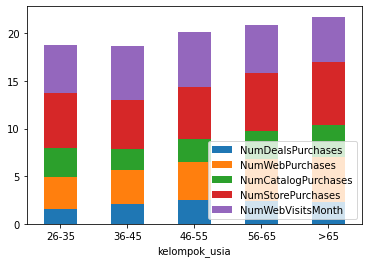

In [16]:
df.groupby(['kelompok_usia'], as_index=True)['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases',
                                             'NumStorePurchases','NumWebVisitsMonth'].mean().plot.bar(stacked=True)
plt.xticks(rotation=0)
plt.legend(loc=4)
plt.show()
# Memvisualisasikan Rata-rata jenis pembelian produk berdasarkan Usia

In [17]:
df.groupby('kelompok_usia')[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases',
                             'NumStorePurchases','NumWebVisitsMonth']].mean()
# Rata-rata jenis pembelian produk berdasarkan Usia

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
kelompok_usia,,,,,
26-35,1.595890,3.335616,2.993151,5.787671,5.034247
36-45,2.092511,3.585903,2.169604,5.167401,5.643172
46-55,2.527197,4.015342,2.329149,5.541144,5.695955
56-65,2.437500,4.335417,2.958333,6.127083,5.027083
>65,2.348449,4.720764,3.357995,6.563246,4.756563


Dari grafik & tabel di atas maka dapat disimpulkan bahwa :

* Rata-rata pembelian **Wine & Emas** tertinggi adalah customer dengan **usia di atas 65 tahun**.  
* Sedangkan untuk rata-rata pembelian **Buah, Daging, Permen & Ikan** tertinggi adalah customer dengan rentang **usia 26 - 35 Tahun**.
* **Rata-rata pembelian produk dengan diskon** tertinggi dilakukan oleh customer dengan rentang **usia 46 - 55 Tahun**.
* Rata-rata pembelian melalui **website, katalog, & toko** tertinggi adalah customer dengan **usia di atas 65 Tahun**.
* **Customer yang paling sering mengunjungi website tiap bulannya** adalah customer dengan rentang **usia 46 - 55 Tahun**.

-----

### Bagaimana kebiasaan belanja pelanggan berdasarkan karakteristik dari Pendidikan?

C:\Users\justi\AppData\Local\Temp\ipykernel_25364\254155721.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Education'], as_index=True)['MntWines','MntFruits','MntMeatProducts',


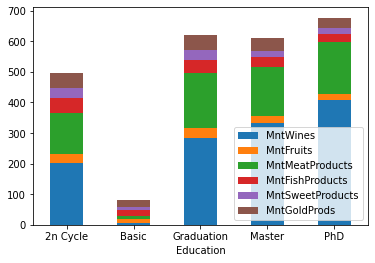

In [18]:
df.groupby(['Education'], as_index=True)['MntWines','MntFruits','MntMeatProducts',
                                         'MntFishProducts','MntSweetProducts',
                                         'MntGoldProds'].mean().plot.bar(stacked=True)
plt.xticks(rotation=0)
plt.legend(loc=4)
plt.show()
# Memvisualisasikan Rata-rata pembelian produk berdasarkan Pendidikan

In [19]:
df.groupby('Education')[['MntWines','MntFruits','MntMeatProducts',
                         'MntFishProducts','MntSweetProducts','MntGoldProds']].mean()
# Rata-rata pembelian produk berdasarkan Pendidikan

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Education,,,,,,
2n Cycle,200.845000,29.360000,135.080000,48.040000,34.725000,46.880000
Basic,7.240741,11.111111,11.444444,17.055556,12.111111,22.833333
Graduation,285.045699,30.861111,180.393369,43.416667,31.285842,50.683692
Master,332.980822,21.375342,162.920548,31.493151,20.808219,40.189041
PhD,407.222453,20.145530,169.738046,26.877339,20.347193,32.403326


C:\Users\justi\AppData\Local\Temp\ipykernel_25364\549158179.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Education'], as_index=True)['NumDealsPurchases','NumWebPurchases',


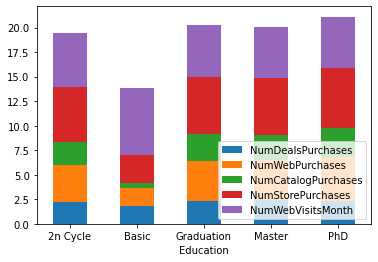

In [20]:
df.groupby(['Education'], as_index=True)['NumDealsPurchases','NumWebPurchases',
                                         'NumCatalogPurchases','NumStorePurchases',
                                         'NumWebVisitsMonth'].mean().plot.bar(stacked=True)
plt.xticks(rotation=0)
plt.legend(loc=4)
plt.show()
# Memvisualisasikan Rata-rata jenis pembelian produk berdasarkan Pendidikan

In [21]:
df.groupby('Education')[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases',
                         'NumStorePurchases','NumWebVisitsMonth']].mean()
# Rata-rata jenis pembelian produk berdasarkan Pendidikan

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Education,,,,,
2n Cycle,2.260000,3.765000,2.355000,5.560000,5.460000
Basic,1.796296,1.888889,0.481481,2.851852,6.870370
Graduation,2.311828,4.115591,2.738351,5.841398,5.284946
Master,2.424658,4.035616,2.545205,5.887671,5.205479
PhD,2.359667,4.432432,2.987526,6.072765,5.251559


Dari grafik & tabel di atas maka dapat disimpulkan bahwa :

* Rata-rata pembelian **Wine** tertinggi adalah customer dengan pendidikan **PhD**.  
* Rata-rata pembelian **Ikan & Permen** tertinggi adalah customer dengan pendidikan **2n Cycle**. 
* Sedangkan untuk rata-rata pembelian **Buah, Daging, & Emas** tertinggi adalah customer dengan pendidikan **Graduation**.
* **Rata-rata pembelian produk dengan diskon** tertinggi dilakukan oleh customer dengan pendidikan **Master**.
* Rata-rata pembelian melalui **website, katalog, & toko** tertinggi adalah customer dengan pendidikan **PhD**.
* **Customer yang paling sering mengunjungi website tiap bulannya** adalah customer dengan pendidikan **Basic**.

-----

### Bagaimana kebiasaan belanja pelanggan berdasarkan karakteristik dari Status Pernikahan ?

C:\Users\justi\AppData\Local\Temp\ipykernel_25364\541866126.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Marital_Status'], as_index=True)['MntWines','MntFruits','MntMeatProducts',


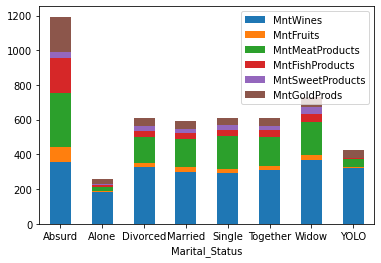

In [22]:
df.groupby(['Marital_Status'], as_index=True)['MntWines','MntFruits','MntMeatProducts',
                                         'MntFishProducts','MntSweetProducts',
                                         'MntGoldProds'].mean().plot.bar(stacked=True)
plt.xticks(rotation=0)
plt.legend(loc=1)
plt.show()
# Memvisualisasikan Rata-rata pembelian produk berdasarkan Status Pernikahan

In [23]:
df.groupby('Marital_Status')[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].mean()
# Rata-rata pembelian produk berdasarkan Status Pernikahan

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Marital_Status,,,,,,
Absurd,355.500000,84.500000,312.500000,205.500000,30.500000,204.000000
Alone,184.666667,4.000000,26.333333,7.666667,7.000000,27.000000
Divorced,324.844828,27.426724,150.206897,35.043103,26.818966,46.288793
Married,299.855309,25.648775,160.896149,35.466744,26.751459,42.845974
Single,291.331210,27.261146,184.849257,38.772824,27.072187,43.305732
Together,308.403141,25.500873,166.446771,39.062827,26.232112,43.200698
Widow,367.131579,31.868421,185.328947,49.907895,37.868421,55.855263
YOLO,322.000000,3.000000,50.000000,4.000000,3.000000,42.000000


C:\Users\justi\AppData\Local\Temp\ipykernel_25364\571455048.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Marital_Status'], as_index=True)['NumDealsPurchases','NumWebPurchases',


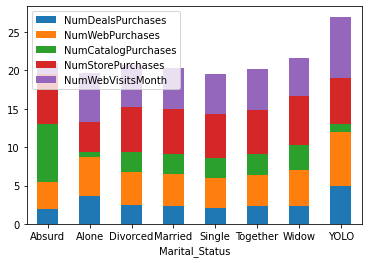

In [24]:
df.groupby(['Marital_Status'], as_index=True)['NumDealsPurchases','NumWebPurchases',
                                         'NumCatalogPurchases','NumStorePurchases',
                                         'NumWebVisitsMonth'].mean().plot.bar(stacked=True)
plt.xticks(rotation=0)
plt.legend(loc=2)
plt.show()
# Memvisualisasikan Rata-rata jenis pembelian produk berdasarkan Status Pernikahan

In [25]:
df.groupby('Marital_Status')[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']].mean()
# Rata-rata jenis pembelian produk berdasarkan Status Pernikahan

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Marital_Status,,,,,
Absurd,2.000000,3.500000,7.500000,6.500000,1.500000
Alone,3.666667,5.000000,0.666667,4.000000,6.333333
Divorced,2.435345,4.310345,2.672414,5.818966,5.487069
Married,2.382730,4.085181,2.630105,5.849475,5.355893
Single,2.131635,3.851380,2.632696,5.677282,5.280255
Together,2.328098,4.102967,2.678883,5.755672,5.277487
Widow,2.355263,4.618421,3.302632,6.355263,4.934211
YOLO,5.000000,7.000000,1.000000,6.000000,8.000000


Dari grafik & tabel di atas maka dapat disimpulkan bahwa :

* Rata-rata pembelian **Wine** tertinggi adalah customer dengan status pernikahan **Widow**.  
* Rata-rata pembelian **Buah, Daging, Ikan, & Emas** tertinggi adalah customer dengan status pernikahan **Absurd**. 
* Rata-rata pembelian **Permen** tertinggi adalah customer dengan status pernikahan **Widow**. 
* **Rata-rata pembelian produk dengan diskon** tertinggi dilakukan oleh customer dengan status pernikahan **Alone**.
* Rata-rata pembelian melalui **website** tertinggi adalah customer dengan status pernikahan **YOLO**
* Rata-rata pembelian melalui **katalog & toko** tertinggi adalah customer dengan pendidikan **Absurd**.
* **Customer yang paling sering mengunjungi website tiap bulannya** adalah customer dengan status pernikahan **YOLO**.

-----

### Bagaimana kebiasaan belanja pelanggan berdasarkan karakteristik dari Pendapatan

C:\Users\justi\AppData\Local\Temp\ipykernel_25364\86565921.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['income_class'], as_index=True)['MntWines','MntFruits','MntMeatProducts',


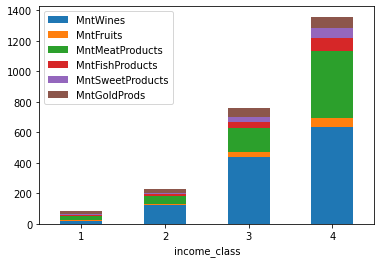

In [26]:
df.groupby(['income_class'], as_index=True)['MntWines','MntFruits','MntMeatProducts',
                                         'MntFishProducts','MntSweetProducts',
                                         'MntGoldProds'].mean().plot.bar(stacked=True)
plt.xticks(rotation=0)
plt.legend(loc=2)
plt.show()
# Memvisualisasikan Rata-rata pembelian produk berdasarkan Kelas Pendapatan

In [27]:
df.groupby('income_class')[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].mean()
# Rata-rata pembelian produk berdasarkan Kelas Pendapatan

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
income_class,,,,,,
1,21.550542,5.935018,22.666065,8.666065,5.924188,16.850181
2,124.823105,8.028881,48.238267,13.586643,8.548736,28.090253
3,439.234657,30.666065,161.090253,39.563177,28.566787,58.620939
4,634.758123,60.794224,435.989170,88.734657,65.075812,72.299639


C:\Users\justi\AppData\Local\Temp\ipykernel_25364\132726360.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['income_class'], as_index=True)['NumDealsPurchases','NumWebPurchases',


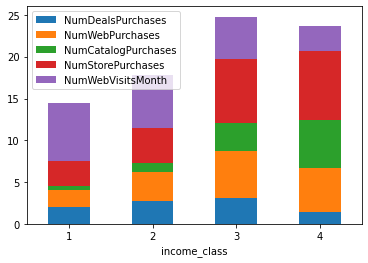

In [28]:
df.groupby(['income_class'], as_index=True)['NumDealsPurchases','NumWebPurchases',
                                         'NumCatalogPurchases','NumStorePurchases',
                                         'NumWebVisitsMonth'].mean().plot.bar(stacked=True)
plt.xticks(rotation=0)
plt.legend(loc=2)
plt.show()
# Memvisualisasikan Rata-rata jenis pembelian produk berdasarkan Kelas Pendapatan

In [29]:
df.groupby('income_class')[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']].mean()
# Rata-rata jenis pembelian produk berdasarkan Status Kelas Pendapatan

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
income_class,,,,,
1,2.061372,2.012635,0.476534,2.960289,6.998195
2,2.750903,3.397112,1.167870,4.209386,6.339350
3,3.066787,5.644404,3.341155,7.696751,5.023466
4,1.415162,5.287004,5.698556,8.337545,2.915162


Dari grafik & tabel di atas maka dapat disimpulkan bahwa :

* Rata-rata pembelian **Wine, Buah, Daging, Ikan, Permen, & Emas** tertinggi adalah customer dengan pendapatan **Kelas 4**. 
* **Rata-rata pembelian produk dengan diskon** tertinggi dilakukan oleh customer dengan pendapatan **Kelas 3**.
* Rata-rata pembelian melalui **website** tertinggi adalah customer dengan pendapatan **Kelas 3**
* Rata-rata pembelian melalui **katalog & toko** tertinggi adalah customer dengan pendapatan **Kelas 4**.
* **Customer yang paling sering mengunjungi website tiap bulannya** adalah customer dengan pendapatan **Kelas 1**.

-----

### Bagaimana kebiasaan belanja pelanggan berdasarkan karakteristik dari Banyaknya Anak di Rumah?

C:\Users\justi\AppData\Local\Temp\ipykernel_25364\3262793151.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Kidhome'], as_index=True)['MntWines','MntFruits','MntMeatProducts',


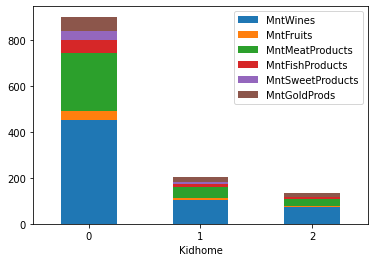

In [30]:
df.groupby(['Kidhome'], as_index=True)['MntWines','MntFruits','MntMeatProducts',
                                         'MntFishProducts','MntSweetProducts',
                                         'MntGoldProds'].mean().plot.bar(stacked=True)
plt.xticks(rotation=0)
plt.legend(loc=1)
plt.show()
# Memvisualisasikan Rata-rata pembelian produk berdasarkan Banyaknya Anak di Rumah

In [31]:
df.groupby('Kidhome')[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].mean()
# Rata-rata pembelian produk berdasarkan Banyaknya Anak di Rumah

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Kidhome,,,,,,
0,452.237724,39.400624,253.405300,56.270460,40.590803,60.045207
1,104.340474,8.541150,49.109357,12.281849,8.612176,22.111612
2,72.000000,6.043478,30.086957,6.869565,3.891304,16.869565


C:\Users\justi\AppData\Local\Temp\ipykernel_25364\1462947288.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Kidhome'], as_index=True)['NumDealsPurchases','NumWebPurchases',


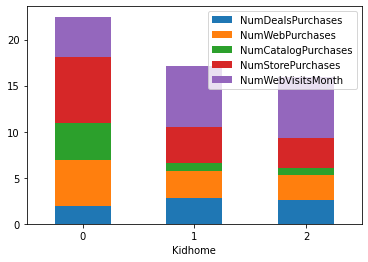

In [32]:
df.groupby(['Kidhome'], as_index=True)['NumDealsPurchases','NumWebPurchases',
                                         'NumCatalogPurchases','NumStorePurchases',
                                         'NumWebVisitsMonth'].mean().plot.bar(stacked=True)
plt.xticks(rotation=0)
plt.legend(loc=1)
plt.show()
# Memvisualisasikan Rata-rata jenis pembelian produk berdasarkan Banyaknya Anak di Rumah

In [33]:
df.groupby('Kidhome')[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']].mean()
# Rata-rata jenis pembelian produk berdasarkan Banyaknya Anak di Rumah

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Kidhome,,,,,
0,1.947779,4.981294,3.968044,7.222915,4.360094
1,2.851184,2.860203,0.898534,3.872604,6.638106
2,2.630435,2.717391,0.673913,3.326087,6.630435


Dari grafik & tabel di atas maka dapat disimpulkan bahwa :

* Rata-rata pembelian **Wine, Buah, Daging, Ikan, Permen, & Emas** tertinggi adalah customer dengan **0/tidak ada** Anak di Rumah. 
* **Rata-rata pembelian produk dengan diskon** tertinggi dilakukan oleh customer dengan **1 orang** Anak di Rumah.
* Rata-rata pembelian melalui **katalog & toko** tertinggi adalah customer dengan **0/tidak ada** Anak di Rumah.
* **Customer yang paling sering mengunjungi website tiap bulannya** adalah customer dengan **1 orang** Anak di Rumah.

-----

### Bagaimana kebiasaan belanja pelanggan berdasarkan karakteristik dari Banyaknya Remaja di Rumah?

C:\Users\justi\AppData\Local\Temp\ipykernel_25364\1995571704.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Teenhome'], as_index=True)['MntWines','MntFruits','MntMeatProducts',


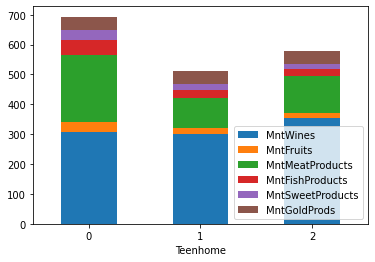

In [34]:
df.groupby(['Teenhome'], as_index=True)['MntWines','MntFruits','MntMeatProducts',
                                         'MntFishProducts','MntSweetProducts',
                                         'MntGoldProds'].mean().plot.bar(stacked=True)
plt.xticks(rotation=0)
plt.legend(loc=4)
plt.show()
# Memvisualisasikan Rata-rata pembelian produk berdasarkan Banyaknya Remaja di Rumah

In [35]:
df.groupby('Teenhome')[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].mean()
# Rata-rata pembelian produk berdasarkan Banyaknya Remaja di Rumah

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Teenhome,,,,,,
0,305.963383,33.344377,226.622493,48.811683,33.550131,45.113339
1,301.630648,18.927308,101.975442,25.763261,20.263261,42.598232
2,354.568627,17.470588,123.843137,23.352941,15.411765,45.431373


C:\Users\justi\AppData\Local\Temp\ipykernel_25364\2076804437.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Teenhome'], as_index=True)['NumDealsPurchases','NumWebPurchases',


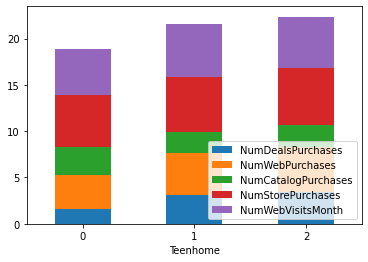

In [36]:
df.groupby(['Teenhome'], as_index=True)['NumDealsPurchases','NumWebPurchases',
                                         'NumCatalogPurchases','NumStorePurchases',
                                         'NumWebVisitsMonth'].mean().plot.bar(stacked=True)
plt.xticks(rotation=0)
plt.legend(loc=4)
plt.show()
# Memvisualisasikan Rata-rata jenis pembelian produk berdasarkan Banyaknya Remaja di Rumah

In [37]:
df.groupby('Teenhome')[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']].mean()
# Rata-rata jenis pembelian produk berdasarkan Banyaknya Remaja di Rumah

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Teenhome,,,,,
0,1.592851,3.652136,3.005231,5.647777,4.992153
1,3.090373,4.535363,2.308448,5.954813,5.678782
2,3.450980,4.843137,2.392157,6.176471,5.490196


Dari grafik & tabel di atas maka dapat disimpulkan bahwa :

* Rata-rata pembelian **Wine & Emas** tertinggi adalah customer dengan **2 Orang** Remaja di Rumah. 
* Rata-rata pembelian **Buah, Daging & Permen** tertinggi adalah customer dengan **0 / Tidak ada** Remaja di Rumah. 
* **Rata-rata pembelian produk dengan diskon** tertinggi dilakukan oleh customer dengan **2 Orang** Remaja di Rumah.
* Rata-rata pembelian melalui **website & toko** tertinggi adalah customer dengan **2 Orang** Remaja di Rumah.
* Rata-rata pembelian melalui **katalog** tertinggi adalah customer dengan **0 / Tidak ada** Remaja di Rumah.
* **Customer yang paling sering mengunjungi website tiap bulannya** adalah customer dengan **1 Orang** Remaja di Rumah.

----

### RFM Analysis

RFM merupakan sebuah singkatan dari recency, frequency, dan monetary value.

Sesuai dengan tujuan dalam menagalisa data. RFM analysis dapat membantu untuk meningkatkan pendapatan dengan menargetkan kelompok tertentu dari pelanggan. Dengan menerapkan analisis ini, maka segmentasi pelanggan akan lebih terpersonalisasi, menyesuaikan perilaku pelanggan pada transaksi di waktu sebelumnya.

In [38]:
# Membuat kolom baru dengan nama frequency & monetary
df['Frequency'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebVisitsMonth']
df['Monetary'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'] 
df[['ID','Recency','Frequency','Monetary']].head()

,ID,Recency,Frequency,Monetary
0,5524,58,32,1617
1,2174,38,11,27
2,4141,26,25,776
3,6182,26,14,53
4,5324,94,24,422


Kolom Frequency berisi jumlah dari banyaknya pembelian dengan diskon + banyaknya pembelian melalui website + banyaknya pembelian melalui katalog + banyaknya pembelian melalui toko
Kolom Monetary berisi jumlah dari banyaknya pembelian produk dari MntWines + MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds

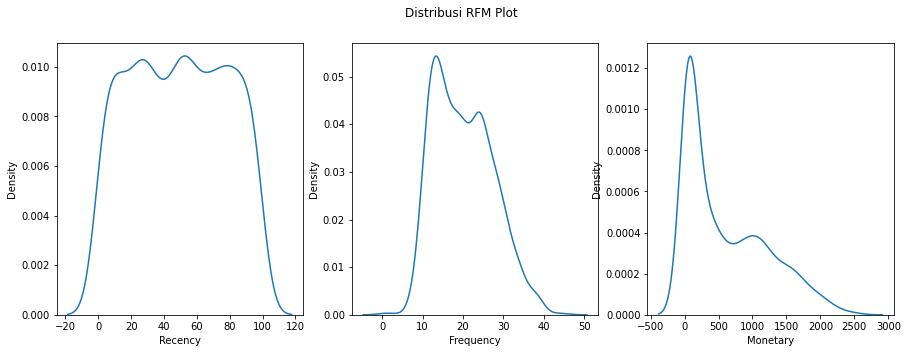

In [39]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plt.Figure(figsize=(8,6))
sns.kdeplot(data=df, x='Recency', ax=axs[0])
sns.kdeplot(data=df, x='Frequency', ax=axs[1])
sns.kdeplot(data=df, x='Monetary', ax=axs[2])
plt.suptitle('Distribusi RFM Plot')
plt.ticklabel_format(useOffset=False) 
plt.show()
# Memvisualisasikan grafik distribusi dari Recency, Frequency, dan Monetary

In [40]:
df['R_rank'] = df['Recency'].rank(ascending=False)
df['F_rank'] = df['Frequency'].rank(ascending=True)
df['M_rank'] = df['Monetary'].rank(ascending=True)

df['R_rank_norm'] = (df['R_rank']/df['R_rank'].max())*100
df['F_rank_norm'] = (df['F_rank']/df['F_rank'].max())*100
df['M_rank_norm'] = (df['F_rank']/df['M_rank'].max())*100
df.head()
# menormalkan peringkat pelanggan dalam suatu perusahaan untuk menganalisis peringkat.

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,kelompok_usia,income_class,Frequency,Monetary,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,65,56-65,3,32,1617,894.0,2073.5,2037.5,40.590238,93.569495,93.590612
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,68,>65,2,11,27,1348.0,174.0,155.0,61.203178,7.851986,7.853758
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,57,56-65,4,25,776,1620.0,1623.0,1429.0,73.552781,73.240072,73.256601
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,38,36-45,1,14,53,1620.0,554.0,413.5,73.552781,25.000000,25.005642
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,41,36-45,3,24,422,113.5,1519.5,1146.0,5.153235,68.569495,68.584970


In [41]:
df['RFM_Score'] = 0.15*df['R_rank_norm']+0.28 * \
    df['F_rank_norm']+0.57*df['M_rank_norm']
df['RFM_Score'] *= 0.05
df = df.round(2)
df[['ID', 'RFM_Score']].head()
# Menilai RFM dalam skala 5
# Rumus yang digunakan untuk menghitung skor rfm adalah: 0,15*Recency + 0,28*Frequency + 0,57 *Monetary

,ID,RFM_Score
0,5524,4.28
1,2174,0.79
2,4141,3.66
3,6182,1.61
4,5324,2.95


RFM Score dibagi menjadi beberapa segment :
* '>' 4.5 : Top Customer
* 4.5 > rfm score > 4 : High Value Customer
* 4>rfm score >3 : Medium value customer
* 3>rfm score>1.6 : Low-value customer
* rfm score<1.6 :Lost Customer

In [42]:
df['Customer_segment'] = np.where(df['RFM_Score'] > 4.5, "Top Customers",
                        (np.where(df['RFM_Score'] > 4,"High value Customer",
                        (np.where(df['RFM_Score'] > 3, "Medium Value Customer", 
                        np.where(df['RFM_Score'] > 1.6, 'Low Value Customers', 'Lost Customers'))))))
df[['ID', 'RFM_Score', 'Customer_segment']].head(20)

,ID,RFM_Score,Customer_segment
0,5524,4.28,High value Customer
1,2174,0.79,Lost Customers
2,4141,3.66,Medium Value Customer
3,6182,1.61,Low Value Customers
4,5324,2.95,Low Value Customers
5,7446,4.19,High value Customer
6,965,3.92,Medium Value Customer
7,6177,2.36,Low Value Customers
8,4855,1.90,Low Value Customers
9,5899,2.79,Low Value Customers


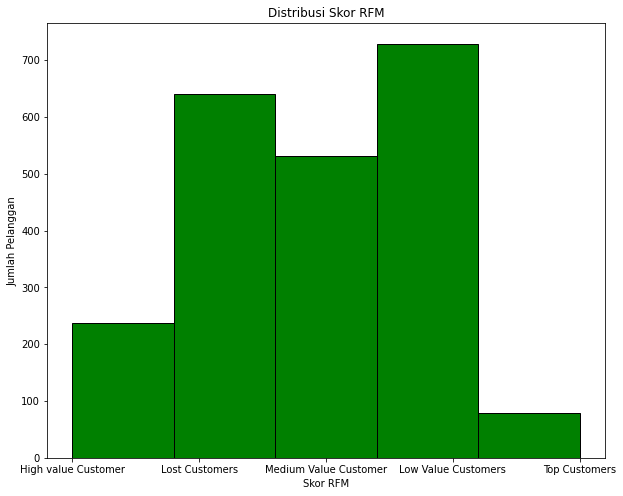

In [43]:
plt.figure(figsize=(10,8))
plt.hist(df['Customer_segment'], bins=5, edgecolor='black', color='green')
plt.xlabel('Skor RFM')
plt.ylabel('Jumlah Pelanggan')
plt.title('Distribusi Skor RFM')

plt.show()
# Memvisualisasikan distribusi skor RFM

## Summary : 

> Setelah melihat kriteria customer pada saat membeli produk, kita ingin kembali ke tujuan awal. Bagaimana cara mendapatkan customer target yang nantinya bisa kita targetkan untuk mengiklankan produk baru. Tentu kita harus menargetkan customer yang kira-kira akan membeli produk dari data historical yang kita punya. Maka dari itu, saya melakukan RFM analysis untuk menentukan/memberikan ranking pada tiap customer berdasarkan kriteria pembeliannya. Nantinya ranking ini juga akan membantu perusahaan dalam menargetkan siapa saja customer yang layak untuk dibagikan promosi produk.

In [45]:
# df.to_excel('capstone.xlsx',sheet_name='lembar1', index=False)
# menyimpan file xlsx untuk dianalisis dalam Tableau